In [1]:
#Algorithm

In [2]:
#Finding out the optimal solution - in the process of exploring

Step 1 : Assume the expected output  for each machine and put them on vertical axis

Step 2: Assume starting point for each machine and since we can't discriminate against the same looking machine, we put the starting out for each machine is same

Step 3: create  the confidence band. Which is designed in such a way that it has a very high level of certainity that the confidence bound will include the expected output for all machines

Step 4: Out of all, we pick the machine with the highest upper confidence bound. In the start, since every machine will have same starting point, confidence bound is the same. Hence we can pick any of those machines

Step 5:We pull that lever of that machine, and we see the output. Accordingly in our longer run, the starting point value converges to the expected value of that machine.

Step 6: Because we have 2nd observation for that machine, the confidence bound become smaller, since we are more sure than before about the distribution of the machine

Step 7: Find the next machine, with highest confidence bound and do the same thing. 

Step 8: Continue the process, untill you find the machine with the highest upper confidence oun

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ucb_data = pd.read_csv('ucb_data.csv')

In [3]:
ucb_data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


#Data: 
-Car company marketing campaigns

-There are 10 ads prepared to put on the social network.

-Different ads had car with different location. One on the mountain, another on the road and so on.

Problem is that 10 great version of same ad. The question is to put which ad on social networking page and hence which ad will get higher conversion rates


We will trying by exploring the ads. We will observe for each ad whether user clicks on it or not. We will do this for 10000 users

But we won't randomly display anyone ad to particular user while exploring. There will be a certain strategy and the strategy will depend on previous round. Basically if we are on round 15, before sending any random ad to the user, we will analyze the results of first 15 ads and send that user the ad accordingly

In [7]:
#This data is random. We don;t know anything about any ad

In [8]:
#If we select ad for each user randomly - What result do we get?

import random
N = 10000 #number of users
d = 10 #number of ads
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = ucb_data.values[n, ad]
    total_reward = total_reward + reward

In [9]:
total_reward

1229

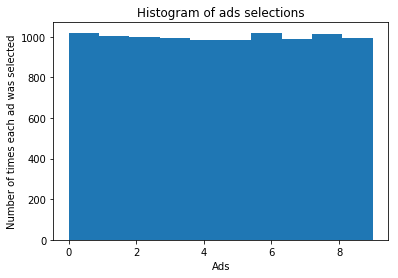

In [10]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [11]:
#Random selection of ads, give same result for each and every ad

In [15]:
#Let's see how UCB algorithms works compared to the random selection

#Impleting UCB - without using any package

#Algorithm:

#Step 1: At each round n ,we consider 2 numbers for each ad i:
    #Ni(n) - the number of times the ad i was selected up to round n
    #Ri(n) - the sum of rewards of the ad i up to round n
    
import math    
ucb_ads_selected = [] #vector of 10000 elements - the ad selected at each round
numbers_of_selections = [0] * d #none of the ads is selected yet and hence number of times each ad was selected is 0 now
sums_of_rewards = [0] * d

#Step 2: From these two numbers, we compute:
    # - The average reward of ad i up to round n
        #ri(n) = Ri(n) / Ni(n)
    
    # - The confidence interval [ri(n) - delta_i(n) , ri(n) + delta_i(n)] at round n with delta(n) = root((3/2)*(log(n)/Ni(n))) 

    
#Step 3: We select the ad i that had the maximum UCB ri(n) + delta_i(n)

ucb_total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0): 
        #The above if condition ensures that each ad was selected atleast once to apply our strategy.
        #For the first 10 rounds we will such select each ad 1 time each, without using any strategy
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1)/numbers_of_selections[i]) 
            upper_bound = average_reward + delta_i
        else: 
            #For the first 10 round, we set upper bound to very high value of 10^400
            #when that upper bound value is compared with the max_upper bound, it goes inside the if statement 
                        #and the corresponding ad is selected
            upper_bound = 1e400 #10^400
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i #select the ad which has max_upper_bound
    ucb_ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1 
    
    reward = ucb_data.values[n,ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward #if value is 0, sums of reward won't change -- sum of rewards for each ad
    ucb_total_reward = total_reward + reward #total reward, irrespective of the ad
    


In [17]:
ucb_total_reward #we doubled the values we got in random selected

2178

In [20]:
ucb_ads_selected

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 0,
 8,
 1,
 2,
 3,
 4,
 5,
 6,
 6,
 7,
 7,
 7,
 9,
 7,
 0,
 6,
 8,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 9,
 7,
 0,
 0,
 6,
 8,
 4,
 0,
 7,
 1,
 1,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 0,
 0,
 7,
 0,
 4,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 7,
 0,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 0,
 7,
 7,
 4,
 7,
 7,
 7,
 1,
 6,
 8,
 0,
 4,
 4,
 2,
 3,
 5,
 9,
 4,
 7,
 0,
 7,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 8,
 4,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 0,
 6,
 4,
 1,
 1,
 1,
 8,
 7,
 2,
 3,
 5,
 9,
 4,
 0,
 1,
 1,
 1,
 6,
 7,
 8,
 4,
 1,
 2,
 3,
 5,
 9,
 0,
 6,
 7,
 8,
 4,
 7,
 1,
 0,
 6,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 7,
 8,
 1,
 0,
 6,
 6,
 6,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 7,
 0,
 4,
 4,
 4,
 4,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 7,
 4,
 8,
 0,
 7,


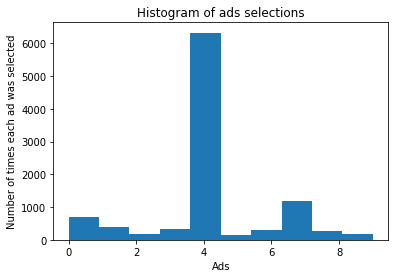

In [19]:
# Visualising the results
plt.hist(ucb_ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()